<a href="https://colab.research.google.com/github/hoonzi-s/data_science/blob/master/TCLab_Step_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install TCLab
!pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.1 MB 7.5 MB/s 


In [50]:
import tclab
import time
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

In [16]:
lab = tclab.TCLabModel()

TCLab version 0.4.9
Simulated TCLab


In [23]:
lab.LED(0)

0

In [24]:
lab.T1

45.122

In [25]:
lab.Q1(0)

0

In [28]:
for i in range(10):
  time.sleep(1)
  print(lab.T1)

44.1551
44.1551
44.1551
43.8328
43.8328
43.51049999999999
43.51049999999999
43.51049999999999
43.188199999999995
43.188199999999995


In [29]:
lab.close()

TCLab Model disconnected successfully.


In [45]:
t = np.linspace(0, 300, 301)
Q1 = np.zeros(301)
Q1[10:100] = 70
Q1[100:200] = 30
Q1[200:300] = 80
T1 = np.empty_like(t)

with tclab.TCLabModel() as lab:
  for i in range(300):
    time.sleep(0.1)
    lab.Q1(Q1[i])
    T1[i] = lab.T1
    if i % 10 == 0:
      print(round(T1[i], 3))
    # print(T1[i])

TCLab version 0.4.9
Simulated TCLab
20.949
20.949
20.949
20.949
20.949
20.949
20.949
20.949
20.949
21.272
21.594
21.594
21.594
21.594
21.916
21.916
22.239
22.239
22.561
22.561
22.561
22.883
22.883
22.883
23.206
23.206
23.528
23.528
23.85
24.172
TCLab Model disconnected successfully.


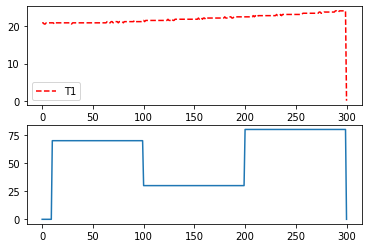

In [47]:
plt.subplot(2, 1, 1)
plt.plot(t, T1, 'r--', label = 'T1')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, Q1)

In [51]:
m = GEKKO()
m.time = t
T = m.Var(T1[0])
Q = m.Param(Q1)

Cp = 500
A = 1.2e-3
mass = 0.004
U = 10
eps = 0.9
sigma = 5.67e-8
Tinf = 296.15
TK = T + 273.15

m.Equation(mass * Cp * T.dt() == U * A * (Tinf - T) + eps * sigma * A * (Tinf **4 - TK**4) + Q])

m.options.IMODE = 4
m.solve()

SyntaxError: ignored